# Midiendo g con el acelerómetro de un celular

> Autor: $\mathbb{R}i \vec c \hbar$

Aquí voy a ilustar como calcular el valor de la aceleración de la gravedad con un celular.

In [1]:
from pylab import *
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import csv

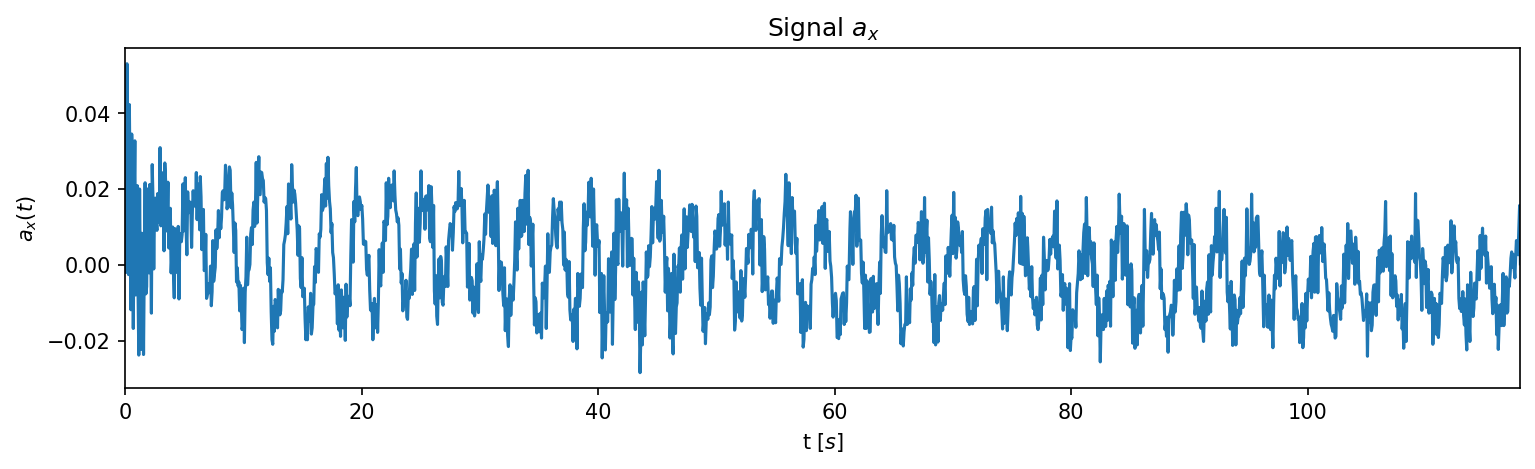

In [3]:
with open('ax_1.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
dat = array(data[1:],dtype=np.float32)
t , a_x = dat[:,0] , dat[:,1]
ini_ind , end_ind = 0 , -1 # signal's sample
t , a_x = t[ini_ind:end_ind]/1e3 , a_x[ini_ind:end_ind]
a_x = a_x - mean(a_x)
dT , N = mean(diff(t)) , len(t)

fig = figure(dpi=150,figsize=(12,3))
title(r'Signal $a_x$')
xlabel('t [$s$]'),ylabel(r'$a_x (t)$')
plot(t,a_x)
xlim([t[0],t[-1]])
show()

(array([42]), {'peak_heights': array([10.69690704])})
nu =  0.355716179588386


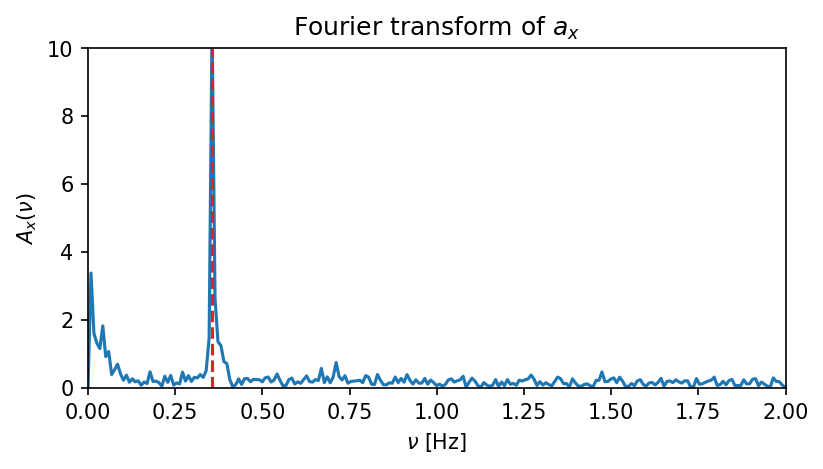

In [4]:
a_x_f = fft(a_x)[:N//2] # half points
t_f = abs(fftfreq(N,dT))[:N//2] # half points
print( find_peaks(abs(a_x_f), height=8) )
peaks=find_peaks(abs(a_x_f),height=8)
nu_max = abs(t_f[peaks[0][0]])
print('nu = ',nu_max)

fig = figure(dpi=150,figsize=(6,3))
title('Fourier transform of $a_x$')
xlabel(r'$\nu$ [Hz]'),ylabel(r'$A_x (\nu)$')
plot(t_f,abs(a_x_f))
vlines([nu_max],0,abs(a_x_f[peaks[0][0]]),ls='dashed',color='tab:red')
xlim([0,2]),ylim([0,10])
show()

$\omega = \sqrt{\frac{g}{l}} \implies g = \omega^2 l$

In [5]:
L = 1.95
print('g = ',(2*pi*nu_max)**2*L)

g =  9.740956114048524


In [8]:
G = 6.67e-11
MT = 5.97e24
RT = 6.371e6
T = 2*np.pi*np.sqrt(RT**3/(G*MT))
print('T=',T/60,'minutos')

T= 84.38979717208464 minutos
